In [1]:
from sklearn.model_selection import train_test_split
from glob import glob
import os
import shutil
import random
import pickle
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import cv2

In [77]:
def get_filepaths(directory,low,high,exten='.jpg'): 
    
    filepaths = []
    weird = [692, 693, 694, 695, 696, 697, 701, 705, 706, 707, 708, 709, 715, 718, 720, 698]
    for filename in os.listdir(directory):
        basename, ext = os.path.splitext(filename)
        if ext != exten:
            continue
        if int(basename) in weird:
            continue
        try:
            number = int(basename)
        except ValueError:
            continue  # not numeric
        if low <= number <= high:
            # process file
            filename = os.path.join(directory, filename)
            filepaths.append(filename)
            
    return filepaths

In [12]:
def copy_files(files,dst):
    
    old_files = glob(os.path.join(dst,'*'))
    for f in old_files:
        os.chmod(f,0o777)
        os.remove(f)
    for file in files:
        shutil.copy(file,dst)

In [13]:
img_src = 'E:/AI/FAPS/dataset/PA_Jakob_Roser_Datentrager/06_Datensatze/01_Images/Images_512x256'
seg_src = 'E:/AI/FAPS/dataset/PA_Jakob_Roser_Datentrager/06_Datensatze/01_Masks/Masks_JPG_512x256'

In [14]:
all_data_neg = get_filepaths(img_src,1,600)
all_data_pos = get_filepaths(img_src,601,1000)
all_data_seg = get_filepaths(seg_src,601,1000,'.png')

In [6]:
for split in [30,8]:
    
    train_pos_dst = f'E:/AI/FAPS/dataset/WS/{split}/train/pos'
    train_neg_dst = f'E:/AI/FAPS/dataset/WS/{split}/train/neg'
    train_seg_dst = f'E:/AI/FAPS/dataset/WS/{split}/train/seg'

    test_pos_dst = f'E:/AI/FAPS/dataset/WS/{split}/test/pos'
    test_neg_dst = f'E:/AI/FAPS/dataset/WS/{split}/test/neg'
    test_seg_dst = f'E:/AI/FAPS/dataset/WS/{split}/test/seg'
    
    train_pos_path,test_pos_path,train_seg_path,test_seg_path = train_test_split(all_data_pos,all_data_seg,random_state=1337)
    train_neg_path,test_neg_path = train_test_split(all_data_neg)
    random.seed(1337)
    train_seg_path = random.sample(train_seg_path,split)
#     copy_files(train_pos_path,train_pos_dst)
#     copy_files(test_pos_path,test_pos_dst)
#     copy_files(train_seg_path,train_seg_dst)
#     copy_files(test_seg_path,test_seg_dst)
#     copy_files(train_neg_path,train_neg_dst)
#     copy_files(test_neg_path,test_neg_dst)
    
    vals = [train_pos_path,test_pos_path,train_seg_path,test_seg_path,train_neg_path,test_neg_path]
    with open(f'E:\AI\FAPS\code\Mixedsupervision\splits\PA\split_{split}.pyb', "wb") as fp:   #Pickling
        pickle.dump(vals, fp)
    

In [32]:
def get_names(paths):
    names = []
    for p in paths:
        name = os.path.basename(os.path.normpath(p))
        name = int(name[:-4])
        names.append(name)
    return names

In [56]:
def read_split(num_seg):
    fn = f"PA/split_{num_seg}.pyb"
    with open(f"splits/{fn}", "rb") as f:
        vals = pickle.load(f)
    return vals

In [8]:
with open(f'labels/l_to_i.pyb', "rb") as fp:   #Pickling
    label_image_pair = pickle.load(fp)
with open(f'labels/i_l.pyb', "rb") as fp:   #Pickling
    image_label_pair = pickle.load(fp)

In [9]:
y_vals = []
for i in range(1,1001):
    y

array([691, 698, 699, 700, 702, 703, 704, 710, 711, 712, 713, 714, 716,
       717, 719, 891, 892, 901, 902, 911, 912, 913, 914, 915, 947, 948,
       953, 954, 959, 960, 961, 985, 989, 993, 994])

In [10]:
image_label_pair[691]

['3', '5']

In [41]:
seg = 0
train_pos_path,test_pos_path,train_seg_path,test_seg_path,train_neg_path,test_neg_path = read_split(seg)

In [51]:
paths = train_pos_path
img_names = get_names(paths)
count_dict = {}
for i in range(1,881):
    if i not in image_label_pair.keys():
        continue
    for l in image_label_pair[i]:
        if l in count_dict.keys():
            count_dict[l]+=1
        else:
            count_dict[l] = 1

In [121]:
X = np.array(list(image_label_pair.keys())).reshape(-1,1)
y = list(image_label_pair.values())

In [122]:
one_hot = MultiLabelBinarizer()

In [123]:
X_train, y_train, X_test, y_test = iterative_train_test_split(X, one_hot.fit_transform(y), test_size = 0.1)


In [78]:
from sklearn.datasets import make_multilabel_classification
X,Y = make_multilabel_classification(n_samples=100, n_classes=3, n_labels=2)

In [79]:
X

array([[0., 2., 5., ..., 1., 1., 6.],
       [2., 3., 1., ..., 0., 5., 3.],
       [0., 6., 2., ..., 2., 8., 2.],
       ...,
       [3., 4., 3., ..., 3., 7., 5.],
       [1., 1., 3., ..., 5., 5., 4.],
       [2., 3., 0., ..., 3., 2., 4.]])

In [2]:
seg_src = "/home/hpc/iwfa/iwfa024h/dataset/mask_512x256/"
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
class_percent = {'3': 751,
 '9': 45,
 '2': 45,
 '10': 45,
 '12': 44,
 '11': 45,
 '8': 45,
 '7': 45,
 '6': 43,
 '1': 45,
 '5': 31,
 '13': 44,
 '4': 45}

In [4]:
weight = { labels:[] for labels in range(1,14)}

In [13]:
for label in range (1,14):
    files = glob(seg_src+f'/*_{label}.jpg')
    for file in files:
        img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        img_n = img>5
        percent = np.sum(img_n)/np.prod(img_n.shape)
        weight[label].append(percent)

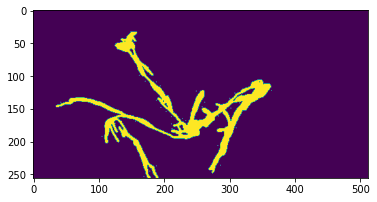

In [103]:
plt.imshow(np.int32(img_n)*255)

In [14]:
weight

{1: [0.0631561279296875,
  0.0625,
  0.06273651123046875,
  0.0625,
  0.0657501220703125,
  0.07666015625,
  0.0589141845703125,
  0.060882568359375,
  0.06640625,
  0.066009521484375,
  0.06110382080078125,
  0.0625,
  0.06640625,
  0.06517791748046875,
  0.06127166748046875,
  0.0656890869140625,
  0.06575775146484375,
  0.058990478515625,
  0.06640625,
  0.06127166748046875,
  0.06021881103515625,
  0.0625,
  0.06276702880859375,
  0.0703125,
  0.06468963623046875,
  0.060546875,
  0.06575775146484375,
  0.059814453125,
  0.062744140625,
  0.060546875,
  0.0603485107421875,
  0.06640625,
  0.0641326904296875,
  0.06380462646484375,
  0.06575775146484375,
  0.06575775146484375,
  0.066009521484375,
  0.06640625,
  0.0625,
  0.060546875,
  0.06640625,
  0.06282806396484375,
  0.06275177001953125,
  0.0625,
  0.06757354736328125,
  0.06333160400390625,
  0.066009521484375,
  0.0628204345703125,
  0.061431884765625,
  0.0645294189453125,
  0.0631561279296875,
  0.0625,
  0.0627365112304

In [15]:
final_weights = []
for key in weight.keys():
    final_weights.append(1/(np.mean(weight[key]) + 0.0001))

In [16]:
final_weights

[15.64043943296152,
 40.58224021694061,
 38.15423151657495,
 10.514066221418894,
 36.46168540936165,
 37.263176185409776,
 32.67227476903832,
 24.7070320001872,
 69.02278248934473,
 141.65853928465205,
 86.48036931509279,
 472.9647476509552,
 12.295801455477223]

In [8]:
final_weights.remove(15.64043943296152)
final_weights.remove(38.15423151657495)

In [9]:
np.round(final_weights,2)

array([ 40.58,  10.51,  36.46,  37.26,  32.67,  24.71,  69.02, 141.66,
        86.48, 472.96,  12.3 ])

In [66]:
import torch

x = torch.ones((1,3,5,4))

In [67]:
x_new = x.squeeze(0)

In [69]:
x_new.sum()

tensor(60.)

In [73]:
(x_new.sum((1,2))/x_new.sum((1,2))).shape

torch.Size([3])